<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%8B%A4%EC%8A%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
# 경고 제거(판다스 error 메시지 무시)
import sys
import warnings

warnings.filterwarnings('ignore')

In [16]:
# 데이터 불러오기

from keras.datasets import mnist

(x_train,y_train) , (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

# configure
encoding_dim = 32
input_img = Input(shape=(784,))

# layers
encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(784, activation = "sigmoid")(encoded)

# Models
autoencoder = Model(input_img , decoded) # autoencoder

encoder = Model(input_img, encoded) # encoder

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input)) # decoder

In [18]:
def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def recall(y_true, y_pred):
  y_true_yn = K.round(K.clip(y_true,0,1))
  y_pred_yn = K.round(K.clip(y_pred,0,1))

  count_true_positive = K.sum(y_true_yn * y_pred_yn)
  count_true_positive_false_negative = K.sum(y_true_yn)
  recall = count_true_positive / (count_true_positive_false_negative + K.epsilon()) 
  return recall

# train autoencoder
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy", metrics=[rmse, recall])
autoencoder.fit(x_train, x_train, 
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data = (x_test,x_test))

# encoding result

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6930 - rmse: 0.4809 - recall: 0.5059 - val_loss: 0.6928 - val_rmse: 0.4809 - val_recall: 0.5059
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6929 - rmse: 0.4808 - recall: 0.5055 - val_loss: 0.6927 - val_rmse: 0.4808 - val_recall: 0.5054
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6927 - rmse: 0.4807 - recall: 0.5050 - val_loss: 0.6925 - val_rmse: 0.4808 - val_recall: 0.5050
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6926 - rmse: 0.4806 - recall: 0.5042 - val_loss: 0.6924 - val_rmse: 0.4807 - val_recall: 0.5045
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6924 - rmse: 0.4806 - recall: 0.5040 - val_loss: 0.6922 - val_rmse: 0.4806 - val_recall: 0.5040
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6923 - rmse: 0.4805 - recall: 0.5036 - val_loss: 0.6921 - 

In [19]:
np.set_printoptions(suppress=True)

In [20]:
encoded_imgs.shape

(10000, 32)

In [21]:
encoded_imgs

array([[0.        , 0.07133099, 0.        , ..., 0.53326887, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.8839164 , 0.16320561,
        0.        ],
       [0.        , 0.        , 0.24404474, ..., 0.629945  , 0.17510411,
        0.        ],
       ...,
       [0.        , 0.        , 0.34790638, ..., 0.7226432 , 0.        ,
        0.        ],
       [0.        , 0.04107292, 0.7562044 , ..., 1.1556228 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.81176805, 0.        ,
        0.        ]], dtype=float32)

In [22]:
decoded_imgs

array([[0.44984275, 0.4895233 , 0.49444038, ..., 0.47595826, 0.5375355 ,
        0.49684483],
       [0.45637265, 0.47641608, 0.5110128 , ..., 0.46739945, 0.52579427,
        0.5020006 ],
       [0.48527095, 0.49138877, 0.48911288, ..., 0.4849178 , 0.5011777 ,
        0.4976067 ],
       ...,
       [0.43646494, 0.49980214, 0.45930126, ..., 0.4619914 , 0.55376637,
        0.49233615],
       [0.4607949 , 0.4741905 , 0.462307  , ..., 0.48340392, 0.5690521 ,
        0.52349406],
       [0.4170629 , 0.48357466, 0.4768991 , ..., 0.45778912, 0.561694  ,
        0.4663628 ]], dtype=float32)

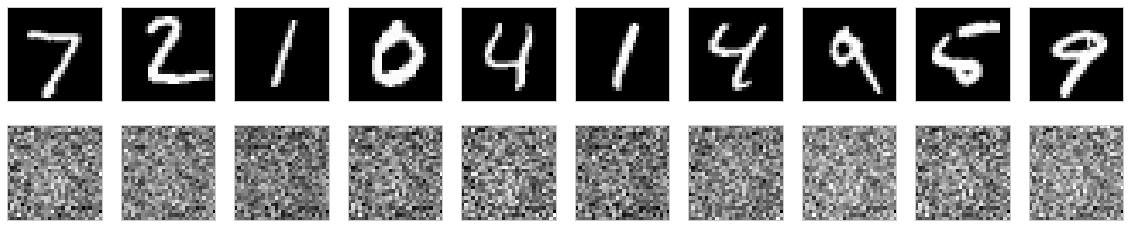

In [23]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()